# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [2]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
1,EVER,Tenzing Norgay,1953,Spr,29-May,11:30,India,M,39,Y,.,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,Spr,24-May,11:00,Switzerland,M,27,Y,.,Nepal
3,EVER,Juerg P. Marmet,1956,Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
4,EVER,Ernst Schmied,1956,Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal


We can create a Data Series containing just the age values. It's then possible to use the describe() method to find out the mean and standard deviation of the ages of summitters.

In [3]:
ages = df.loc[:,'Age']
ages.describe()

count    10010.000000
mean        35.293906
std          9.314089
min         13.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         80.000000
Name: Age, dtype: float64

Plotting a histogram of the age Data Series gives us an idea of the shape of the distribution. This is often the best indicator of what distribution is appropriate when generating synthetic data.

(array([ 151., 1629., 2943., 2221., 1825.,  832.,  296.,   93.,   17.,
           3.]),
 array([13. , 19.7, 26.4, 33.1, 39.8, 46.5, 53.2, 59.9, 66.6, 73.3, 80. ]),
 <BarContainer object of 10 artists>)

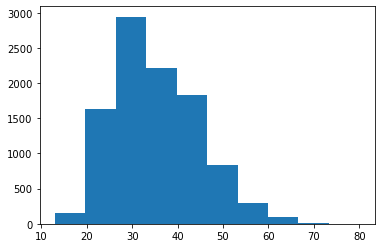

In [18]:
plt.hist(ages, bins=10)

This histogram looks relatively normally distributed. We can try generating a dataset using the mean and standard deviation of the ages Data Series.

[29.02832326 44.54181981 51.44384294 26.20465905 39.18522954 33.95859186
 45.50513842 30.54692605 35.35633005 25.62937641 37.19104734 39.89519318
 30.10238323 43.95674927 35.18135989 38.4908207  32.11210159 31.05148963
 27.4073039  16.4234594  41.71306588 26.85970025 19.10645123 34.48428339
 38.97145306 32.31775662 32.80585218 33.59959182 29.10437039 40.19548416
 37.6797536  34.71091847 44.52322271 38.50583777 42.34953164 38.29857619
 15.3387727  44.0113355  45.2588396  46.04518587 36.44899853 44.90785321
 37.12136105 29.02351185 43.74568171 42.74391533 29.50042863 34.38483412
 46.1701387  32.04662168 33.63976622 27.94395685 43.1406185  39.67645731
 41.86108905 25.27752722 36.85645345 40.92438767 34.07664348 39.98783379
 42.1024129  49.92333974 30.02253332 37.56985646 60.1050809  36.21210866
 33.45147192 30.2465124  44.88173184 23.46332094 28.29672265 27.22443854
 35.25502223 57.48196073 46.45592919 45.606562   28.3224724  47.59383114
 34.57822341 38.68334302 27.69339863 37.78233605 37

(array([ 1.,  1.,  7., 17., 47., 48., 42., 26.,  6.,  5.]),
 array([ 2.12858773,  7.92623704, 13.72388636, 19.52153568, 25.319185  ,
        31.11683431, 36.91448363, 42.71213295, 48.50978227, 54.30743158,
        60.1050809 ]),
 <BarContainer object of 10 artists>)

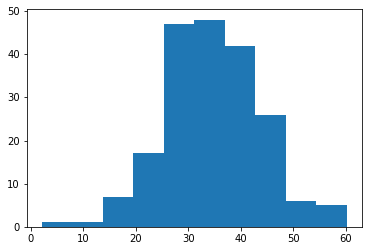

In [54]:
rng = np.random.default_rng()
vals = rng.normal(loc=ages.mean(), scale=ages.std(), size=200)
print(vals)
plt.hist(vals, bins=10)

This appears to be a pretty close approximation of the age Data Series so we will use the variable vals to synthesise age data. Next we consider the probability that a summitter climbed without oxygen. 

In [27]:
noOxygen = df.loc[df.loc[:,'Oxy'] == 'No']
noOxygen.describe()

,Year,Age
count,213.000000,213.000000
mean,2000.680751,35.394366
std,10.407792,6.350187
min,1978.000000,20.000000
25%,1993.000000,31.000000
50%,2001.000000,35.000000
75%,2010.000000,40.000000
max,2019.000000,55.000000


In [49]:
minNoOxAge = noOxygen.Age.mean() - noOxygen.Age.std()*3
maxNoOxAge = noOxygen.Age.mean() + noOxygen.Age.std()*3

print('Minimum age for no oxygen attempt is {} and maximum age is {}.'.format(round(minNoOxAge,1), round(maxNoOxAge,2)))

Minimum age for no oxygen attempt is 16.3 and maximum age is 54.44.


A recent [experiment](https://abcnews.go.com/Health/story?id=2955209&page=1) at Everest Base Camp and the [successful ascent](https://www.nytimes.com/2010/05/20/sports/20climber.html) of a 13 year old show the controversy around the ethics of minors at high altitude.

In [50]:
noOxPotential = df.loc[df.loc[:,'Age'] >= 18].Age.count() + df.loc[df.loc[:,'Age'] <= 18].Age.count()
noOxPotential

10054

In [52]:
noOxProbability = noOxygen.Age.count() / noOxPotential
noOxProbability

0.021185597772031033

In [53]:
synNoOx = rng.binomial(1, noOxProbability)
synNoOx

0